!apt -qq -y install fonts-nanum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 한국어 출력
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath,size=9)
plt.rc('font',family='NanumBarunGothic')
fm._rebuild()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final_project/samsung.csv',index_col=0)
df

,name,headline,date,change
0,삼성전자,"포스코, 순천시 해룡산단 마그네슘 판재공장 430억 조기 투자",2017-01-02,1
1,삼성전자,"""혁신·변화로 위기 돌파""...대기업 새해 다짐",2017-01-02,1
2,삼성전자,'노트7' 발화 원인 이르면 이달 중순 발표,2017-01-02,1
3,삼성전자,경제 위기감 커진 새해…대기업 총수들 “변화”,2017-01-02,1
4,삼성전자,재계 신년 화두는 ‘재도약·신뢰 회복’,2017-01-02,1
...,...,...,...,...
24348,삼성전자,힘없이 막 내린 韓증시…코스피 올해 3.6% 올랐다,2021-12-30,0
24349,삼성전자,해외 하늘길 막히고 생산 줄이고…짙어지는 오미크론 먹구름,2021-12-30,0
24350,삼성전자,사내 급식 이어 물류·SI까지 칼날···공정위 '일감 나누기' 압박도 거세,2021-12-30,0
24351,삼성전자,"SK하이닉스, 인텔 낸드 1단계 인수완료…특별성과급도 300% 시원하게",2021-12-30,0


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24353 entries, 0 to 24352
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      24353 non-null  object        
 1   headline  24353 non-null  object        
 2   date      24353 non-null  datetime64[ns]
 3   change    24353 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 951.3+ KB


In [ ]:
# headline과 labeling(change)만 뽑아내보기

train_df = df[df['date'] < pd.to_datetime('2021-01-01')]
test_df = df[df['date'] >= pd.to_datetime('2021-01-01')]
train_df.info(), test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19413 entries, 0 to 19412
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      19413 non-null  object        
 1   headline  19413 non-null  object        
 2   date      19413 non-null  datetime64[ns]
 3   change    19413 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 758.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4940 entries, 19413 to 24352
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      4940 non-null   object        
 1   headline  4940 non-null   object        
 2   date      4940 non-null   datetime64[ns]
 3   change    4940 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 193.0+ KB


(None, None)

In [ ]:
train_df['type'] = 'train'
test_df['type'] = 'test'

df = pd.concat([train_df,test_df])
df.tail()

,name,headline,date,change,type
24348,삼성전자,힘없이 막 내린 韓증시…코스피 올해 3.6% 올랐다,2021-12-30,0,test
24349,삼성전자,해외 하늘길 막히고 생산 줄이고…짙어지는 오미크론 먹구름,2021-12-30,0,test
24350,삼성전자,사내 급식 이어 물류·SI까지 칼날···공정위 '일감 나누기' 압박도 거세,2021-12-30,0,test
24351,삼성전자,"SK하이닉스, 인텔 낸드 1단계 인수완료…특별성과급도 300% 시원하게",2021-12-30,0,test
24352,삼성전자,마지막 날도 날아오른 SK하이닉스···7개월 만에 '13만닉스',2021-12-30,0,test


In [ ]:
# 2020년까지만 train_df으로 들어있는지 확인하기
train_df.sort_values('date',ascending=False)

,name,headline,date,change,type
19412,삼성전자,눈물의 최후진술로 '개혁' 강조한 이재용…내달 최종 선고 촉각(종합),2020-12-30,1,train
19402,삼성전자,4년간 혹독한 대가 치른 삼성…이제 이재용 놓아줘야 할 때,2020-12-30,1,train
19393,삼성전자,"연말 랠리, 코스피 최고가 마감...삼성전자 8만 원 돌파",2020-12-30,1,train
19394,삼성전자,"뜨거웠던 코스피, 역대 최고치 마감",2020-12-30,1,train
19395,삼성전자,"[전문]이재용 부회장 최후진술…""국민에 진 빚 갚겠다""",2020-12-30,1,train
...,...,...,...,...,...
16,삼성전자,"딥체인지, 퀀텀점프...정유년 재계 '과감한 혁신' 이구동성",2017-01-02,1,train
17,삼성전자,"[마켓인사이트] 국민연금, 주식 수익률 5.6%…4년 만에 최대",2017-01-02,1,train
18,삼성전자,"삼성, 준프리미엄폰 2017년형 갤럭시A 공개",2017-01-02,1,train
19,삼성전자,[여의도 stock] 중국 ‘무역보복’에 흔들린 새해 증시,2017-01-02,1,train


In [ ]:
# 분리한 train, test에서 headline과 change만 뽑아내기
cols = ['headline','change']
train_df = train_df[cols]
test_df = test_df[cols]
df = df[cols]
test_df.reset_index(inplace=True)
del test_df['index']

test_df.tail()

,headline,change
4935,힘없이 막 내린 韓증시…코스피 올해 3.6% 올랐다,0
4936,해외 하늘길 막히고 생산 줄이고…짙어지는 오미크론 먹구름,0
4937,사내 급식 이어 물류·SI까지 칼날···공정위 '일감 나누기' 압박도 거세,0
4938,"SK하이닉스, 인텔 낸드 1단계 인수완료…특별성과급도 300% 시원하게",0
4939,마지막 날도 날아오른 SK하이닉스···7개월 만에 '13만닉스',0


- headline에 특수문자와 ... 등 제거(정규표현식으로 이용)

- 텍스트 데이터 전처리

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import re

def apply_regular_expression(headline):
  # 한글 추출 규칙 : 띄어쓰기(1 개)를 포함한 한글
  hangeul = re.compile('[^ ㄱ-ㅣ 가-힣]')
  result = hangeul.sub('', headline)
  return result

In [ ]:
train_df['headline'][200], test_df['headline'][200]

('中 ‘질적 도약’ 시동…“韓, 첨단제품 주력해야”', '개미 총알 아직도 75조…증권사가 추천하는 분산투자상품')

In [ ]:
apply_regular_expression(train_df['headline'][200]), apply_regular_expression(test_df['headline'][200])

(' 질적 도약 시동 첨단제품 주력해야', '개미 총알 아직도 조증권사가 추천하는 분산투자상품')

- (감성분석) 숫자 포함이 안된다는 점
- 

In [ ]:
#한국어 형태소 분석 (명사 단위)

from konlpy.tag import Okt
from collections import Counter

In [ ]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(train_df['headline'][400]))
nouns

['달러', '환율', '석', '달', '최저', '수출', '비상']

In [ ]:
# 전체 말뭉치에 적용해 명사 형태소를 추출
train_corpus = "".join(train_df['headline'].tolist())
test_corpus = "".join(test_df['headline'].tolist())
test_corpus

'신축년 대세 `바로 나!`…컬러풀 `주방 가전` 쏟아진다증시, 새해 첫 거래일 2,900 돌파...개인 1조 넘게 순매수코로나 이후 바라보는 재계 “ESG 강화”신축년 첫 거래일 2944.45 코스피 사상 최고치[데일리안 오늘뉴스 종합] 문대통령, 사면론·동부구치소 사태에 침묵하는 이유, 주...[김주하 AI앵커] 위기 또 위기…"변해야 살아남는다"코스피 개장 첫날 2,900 돌파…3천 선 \'눈앞\'디지털 혁신·ESG로 생존 모색…재계 총수 신년사 화두는?"올해는 `포스트 코로나` 경쟁력 확보 원년"일주일 앞 CES…삼성·LG `새로운 일상` 놓고 격돌이재용 “건강한 생태계로 반도체 신화 만들자”현대 전기차 9조 배터리 물량 누구 품으로?이재용 "시스템반도체 신화 만들자"[박일근의 이코노픽] 700만 동학개미가 쏘아 올린 증시, 주가도 집값처럼?"함께하면 미래 열린다"…위기 속 희망 외치는 재계 총수들새해 첫날 코스피 최고가 경신…현대위아 상한가·삼성전자 신고가불붙은 코스피…새해 첫날 2,900 넘었다사상 첫 온라인 CES D-7…삼성·LG가 내놓을 혁신 제품은?식지 않는 기업공개 열기 1월에만 10곳 이상 준비재계 신년사 화두는 ‘고객’ ‘신사업’ ‘사회적 기업’(종합)반도체 호황 전망에 \'10만 전자\' 갈까…"지나친 낙관 금물"[신년 대예측]코스피 3천 시대?…동학개미 힘 어디까지?[데일리안 오늘뉴스 종합] 박원순 피소 몰랐다는 남인순에 野 맹폭, 배달비 부담에...삼성전자, 서초사옥 입점업체 임대료 올려…"건물 가치 올랐다"KAIST, 성인 뇌가 기억력을 유지하는 메커니즘 규명日 닛케이 2020년 최우수 제품 삼성 ‘갤럭시Z플립’ 선정반도체 슈퍼사이클 다시 탄다…올해 수출 1000억달러 재돌파(종합)호재 속 성장동력 확보... 삼성·LG전자, 올해도 핑크빛 전망KB·하나 `내부출신` 신한·우리·농협 `외부인사` 중심 진두지휘\'동학개미의 힘\' 코스피 3000 시대 ‘눈앞’"지금 주식시장 과열인가"…증권사 리서치센터장들이 답했다(종합)올 반도체 수

In [ ]:
# 전체 헤드라인 정규표현식 사용
apply_regular_expression(train_corpus)

'포스코 순천시 해룡산단 마그네슘 판재공장 억 조기 투자혁신변화로 위기 돌파대기업 새해 다짐노트 발화 원인 이르면 이달 중순 발표경제 위기감 커진 새해대기업 총수들 변화재계 신년 화두는 재도약신뢰 회복특검 수사에 바짝 낮춘 이재용최태원은 대담하게위기의 정유년 들은 성장을 돌파구 삼다갤노트 발화원인 곧 발표늦어도 월 말 예상증시 월 효과 나타날 수 있을까위기 돌파 나선 총수들 새해 비장한 경영 화두는이코노 브리핑 삼성전자 년형 갤럭시 출시 외재계  경영화두 정몽구 미래성장 구본무최태원 근본적 변화 기업 총수 신년 화두 혁신성장경동나비엔 보일러 만대 생산세계 위 도약서울경제 재계 새해 화두는 변화와 혁신자전거 헬멧 쓰고 음악감상 어헤드 하나면 사고위험 뚝딥체인지 퀀텀점프정유년 재계 과감한 혁신 이구동성마켓인사이트 국민연금 주식 수익률 년 만에 최대삼성 준프리미엄폰 년형 갤럭시 공개여의도  중국 무역보복에 흔들린 새해 증시삼성 피해자 모드 전략 통할까이재용에 뇌물죄 적용해야 조원대 이득 환수하라김빠진 재계 신년회 총수들 대거 불참경제대담  트럼프노믹스  시진핑노믹스이부진과 이혼소송 임우재 삼성전기 사실상 퇴사한계 뛰어넘은 산업간 이종교배로 차 산업혁명 신세계 연다반도체 초호황 조 시대삼성 훨훨대변혁 시대다시 시작이다 고임금강성 노조 피해 엑소더스한국엔 유턴 일 장 마감 후 주요 종목뉴스오랜만이다 너 차화정이부진과 이혼소송 임우재 사실상 삼성전기 퇴사시황 코스피 삼성전자 최고가 경신에 선 회복한중일  설비에 조 베팅디스플레이 패널 쩐의 전쟁 시작됐이부진과 이혼소송 임우재 삼성전기 퇴사새해 벽두부터 움츠린 기업 재계 신년인사회 전경련 회장도 불참삼성전자 사상 최고가코스피 선 안착국민연금 삼성물산제일모직 합병 미래가치에 뒀다이슈 출연 걱정이 태산재계 양 아닌 질로 승부년 삼성 합병 무산됐다면 엘리엇 먹잇감 됐을것 선진한국 비전을 회복하라 경제분야 경기 좋아져도 정유화학 수우울한 경제계 신년인사회대그룹 총수들 모두 불참냐 냐삼성 첨단 자존심 대결삼성 자존심 건 신기술 경쟁

In [ ]:
# 전체 말뭉치(corpus)에서 명사 형태소 추출
train_nouns = okt.nouns(apply_regular_expression(train_corpus))
test_nouns = okt.nouns(apply_regular_expression(test_corpus))
print(test_nouns)

['신축년', '대세', '바로', '나', '컬러풀', '주방', '가전', '증시', '새해', '첫', '거래', '일', '돌파', '개인', '조', '코로나', '이후', '재계', '강화', '신축년', '첫', '거래', '일', '코스피', '사상', '최고', '치', '데일리안', '오늘', '뉴스', '종합', '대통령', '사면', '론', '동부', '구치소', '사태', '침묵', '이유', '김주하', '앵커', '위기', '또', '위기', '코스피', '개장', '첫날', '돌파', '선', '눈앞', '디지털', '혁신', '로', '생존', '모색', '재계', '총수', '신년사', '화두', '올해', '포스트', '코로나', '경쟁력', '확보', '원년', '일주일', '앞', '삼성', '일상', '격돌', '이재용', '생태계', '반도체', '신화', '현대', '전기차', '조', '배터리', '물량', '누구', '품', '이재용', '시스템', '반도체', '신화', '박일근', '이코노픽', '만', '동학', '개미', '증시', '주가', '집값', '미래', '린다', '위기', '속', '희망', '재계', '총수', '새해', '첫날', '코스피', '최고', '대위', '상한', '전자', '신고', '가불', '코스피', '새해', '첫날', '사상', '첫', '온라인', '삼성', '혁신', '제품', '식지', '기업', '공개', '열기', '월', '곳', '이상', '준비', '재계', '신년사', '화두', '고객', '사업', '사회', '기업', '종합', '반도체', '호황', '전망', '만', '전자', '친', '낙관', '금물', '신년', '예측', '코스피', '천', '시대', '동학', '개미', '힘', '어디', '데일리안', '오늘', '뉴스', '종합', '박원순', '피소', '남인순', '맹폭', '배달', '비', '부담', '전자', '서초', '

In [ ]:
# 빈도 탐색

train_cnt = Counter(train_nouns)
train_cnt.most_common(30)

[('삼성', 6645),
 ('전자', 3536),
 ('반도체', 1482),
 ('이재용', 1426),
 ('기업', 1133),
 ('코스피', 978),
 ('일', 973),
 ('년', 736),
 ('등', 658),
 ('투자', 647),
 ('위', 626),
 ('외국인', 600),
 ('종합', 573),
 ('거래소', 563),
 ('갤럭시', 555),
 ('경제', 543),
 ('시장', 499),
 ('성전', 473),
 ('최고', 472),
 ('부회장', 455),
 ('첫', 444),
 ('한국', 443),
 ('실적', 421),
 ('코로나', 420),
 ('회장', 419),
 ('선', 411),
 ('공장', 408),
 ('기술', 408),
 ('종목', 401),
 ('그룹', 400)]

In [ ]:
# 한글자 명사 제거

available_cnt = Counter({x: cnt[x] for x in cnt if len(x) > 1})
available_cnt.most_common(300) 

[('삼성', 6645),
 ('전자', 3536),
 ('반도체', 1482),
 ('이재용', 1426),
 ('기업', 1133),
 ('코스피', 978),
 ('투자', 647),
 ('외국인', 600),
 ('종합', 573),
 ('거래소', 563),
 ('갤럭시', 555),
 ('경제', 543),
 ('시장', 499),
 ('성전', 473),
 ('최고', 472),
 ('부회장', 455),
 ('한국', 443),
 ('실적', 421),
 ('코로나', 420),
 ('회장', 419),
 ('공장', 408),
 ('기술', 408),
 ('종목', 401),
 ('그룹', 400),
 ('기관', 400),
 ('사업', 390),
 ('출시', 380),
 ('하이닉스', 374),
 ('분기', 366),
 ('경영', 364),
 ('최대', 361),
 ('스마트폰', 342),
 ('세계', 341),
 ('가전', 332),
 ('업종', 324),
 ('수출', 316),
 ('공개', 299),
 ('상위', 298),
 ('국내', 295),
 ('글로벌', 287),
 ('마감', 279),
 ('혁신', 274),
 ('증시', 272),
 ('협력', 266),
 ('미래', 264),
 ('대기업', 258),
 ('재계', 255),
 ('영업', 255),
 ('포토', 255),
 ('노트', 250),
 ('정부', 250),
 ('뉴스', 249),
 ('사상', 249),
 ('규제', 241),
 ('이데일리', 235),
 ('산업', 233),
 ('금융', 232),
 ('전기', 231),
 ('사장', 228),
 ('대통령', 228),
 ('준법', 224),
 ('코스닥', 220),
 ('총수', 217),
 ('하락', 216),
 ('돌파', 212),
 ('매도', 212),
 ('화웨이', 212),
 ('중국', 211),
 ('디스플레이', 204),
 ('상승',

In [ ]:
!pip install nltk

In [ ]:
import nltk


ko = nltk.Text(nouns)
ko

<Text: 포스코 순천시 해룡산 단 마그네슘 판재 공장 억...>

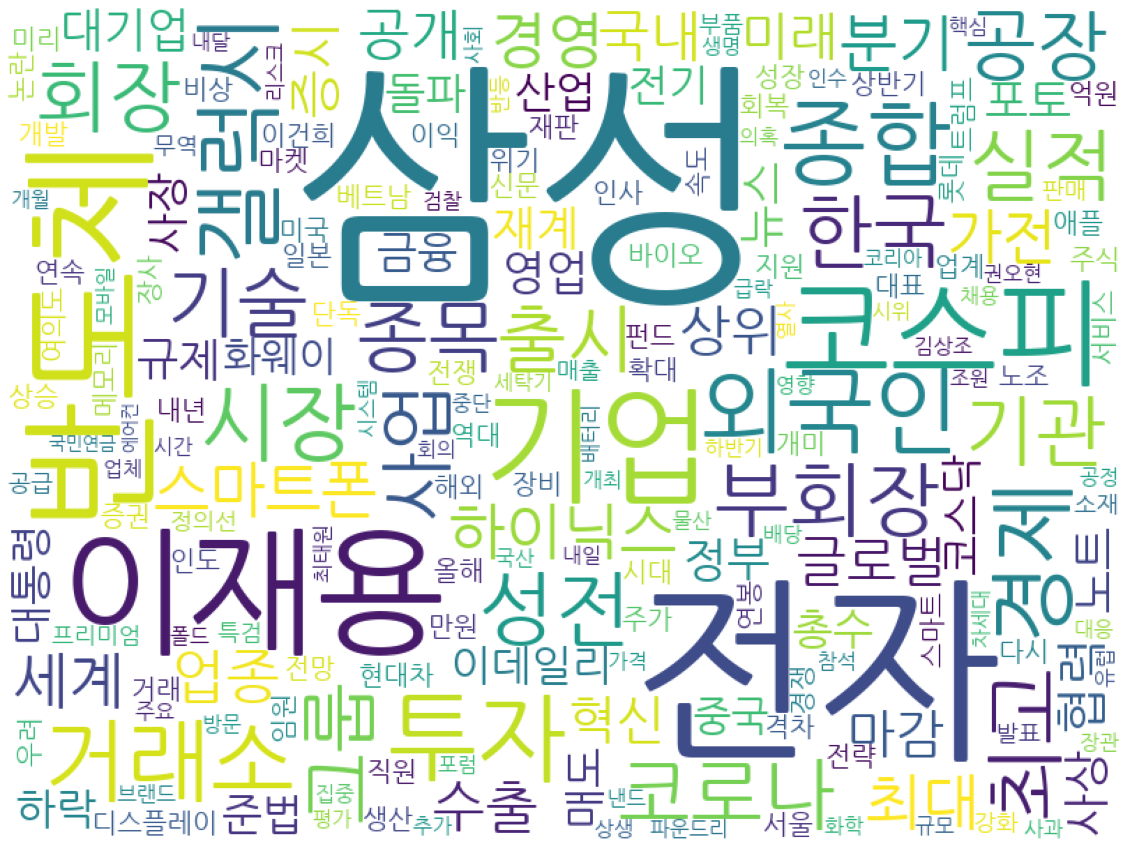

In [ ]:
from wordcloud import WordCloud, STOPWORDS

data = available_cnt.most_common(200)

font_path="C:/Windows/Fonts/NanumGothic.ttf"
wc = WordCloud(font_path=font_path, background_color="white", width=800, height=600)
cloud = wc.generate_from_frequencies(dict(data))
plt.figure(figsize = (20, 16))
plt.axis('off')
plt.imshow(cloud)


- 불용어는 일단 스킵하고
- word count
  - bag of Words 벡터 생성
  

- rank NL 에서 제공해주는 한국어 불용어 사전 활용해보기


In [ ]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()


## 우리가 분석하고자 하는 데이터셋에 특화된 불용어들 사전에 추가

my_stopwords= ['삼성','전자','이재용','코스피','종합','부회장','그룹','이데일리','주식','이건희','인사','대표','부고','미리','여의도','정의선','권오현','코리아','회의','최태원','장관','개월','보고서','평택','오늘','이번','관련','네이버','국가','일부']
stopwords.extend(my_stopwords)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['headline'].tolist())
#test_bow_vect = vect.fit_transform(test_df['headline'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)
#test_count_list = bow_vect.toarray().sum(axis=0)


In [ ]:
# 단어 리스트
word_list[:40]

['가가',
 '가격',
 '가격담합',
 '가계',
 '가계부채',
 '가공',
 '가교',
 '가구',
 '가급',
 '가기',
 '가까스로',
 '가까이',
 '가나',
 '가난',
 '가늠',
 '가늠자',
 '가능',
 '가능성',
 '가닥',
 '가대',
 '가도',
 '가동',
 '가드',
 '가득',
 '가라',
 '가량',
 '가려진',
 '가로',
 '가로본능폰',
 '가루',
 '가림',
 '가마솥',
 '가마우지',
 '가맹',
 '가문',
 '가뭄',
 '가방',
 '가사',
 '가산',
 '가상']

In [ ]:
# 각 단어가 전체 헤드라인 중에 등장한 총 횟수
count_list

array([  2, 161,   2, ...,   1,   1,   9])

In [ ]:
bow_vect.shape

(24353, 11399)

In [ ]:
# 단어 : 총 등장 횟수 매칭해주기

word_cnt_dict = dict(zip(word_list,count_list))
#test_word_cnt_dict = dict(zip(word_list,test_count_list))
word_cnt_dict

{'가가': 2,
 '가격': 161,
 '가격담합': 2,
 '가계': 5,
 '가계부채': 2,
 '가공': 3,
 '가교': 1,
 '가구': 35,
 '가급': 2,
 '가기': 6,
 '가까스로': 2,
 '가까이': 8,
 '가나': 14,
 '가난': 1,
 '가늠': 2,
 '가늠자': 1,
 '가능': 58,
 '가능성': 74,
 '가닥': 4,
 '가대': 1,
 '가던트': 1,
 '가도': 5,
 '가동': 113,
 '가두': 1,
 '가드': 39,
 '가드닝': 1,
 '가득': 1,
 '가뜩이나': 1,
 '가라': 4,
 '가량': 2,
 '가려진': 1,
 '가로': 3,
 '가로본능폰': 1,
 '가루': 1,
 '가림': 2,
 '가마솥': 1,
 '가마우지': 1,
 '가맹': 1,
 '가문': 4,
 '가뭄': 4,
 '가방': 2,
 '가변': 1,
 '가사': 2,
 '가산': 1,
 '가상': 27,
 '가상공간': 1,
 '가상세계': 1,
 '가상현실': 3,
 '가상화': 1,
 '가석방': 38,
 '가성': 19,
 '가세': 27,
 '가속': 68,
 '가속도': 13,
 '가스': 11,
 '가스레인지': 3,
 '가슴': 4,
 '가습기': 3,
 '가시': 18,
 '가시대': 1,
 '가신': 3,
 '가액': 1,
 '가야': 2,
 '가야선': 1,
 '가열': 7,
 '가옥': 1,
 '가왜': 1,
 '가요': 5,
 '가용': 1,
 '가운데': 2,
 '가을': 12,
 '가의': 1,
 '가이드': 1,
 '가이드라인': 9,
 '가입': 26,
 '가입자': 19,
 '가장': 64,
 '가재': 2,
 '가전': 415,
 '가전제품': 15,
 '가정': 17,
 '가족': 27,
 '가주': 2,
 '가중': 12,
 '가즈': 1,
 '가증': 1,
 '가지': 37,
 '가짜': 8,
 '가차': 1,
 '가처분': 7,
 '가치': 103,
 '가치주': 6,
 '가치투

In [ ]:
# tf-idf 적용

# bow 벡터에 대해 tf-idf 변환 진행하기

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)
#test_tf_idf_vect = tfidf_vectorizer.fit_transform(test_bow_vect)



print(tf_idf_vect.shape)
#print(test_tf_idf_vect.shape)


(24353, 11399)


In [ ]:
# 첫 번째 헤드라인에서 단어 중요도 (TF-IDF 값) - 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 10838)	0.43551122675483256
  (0, 10392)	0.29998325544597065
  (0, 10225)	0.43551122675483256
  (0, 10045)	0.18176189043621618
  (0, 8469)	0.30252019516613876
  (0, 5382)	0.43551122675483256
  (0, 2742)	0.41854385430644886
  (0, 738)	0.2031382516601352


In [ ]:
# 첫 번째 헤드라인에서 모든 단어의 중요도 -- 0인 값까지 포함

print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 11429)
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#'벡터'- '단어' 매핑
vect.vocabulary_

{'포스코': 10392,
 '순천시': 5382,
 '해룡산': 10838,
 '마그네슘': 2742,
 '판재': 10225,
 '공장': 738,
 '조기': 8469,
 '투자': 10045,
 '혁신': 10970,
 '변화': 3891,
 '위기': 7000,
 '돌파': 2284,
 '대기업': 2024,
 '새해': 4755,
 '다짐': 1903,
 '노트': 1740,
 '발화': 3629,
 '원인': 6947,
 '중순': 8738,
 '발표': 3625,
 '경제': 493,
 '총수': 9315,
 '재계': 7939,
 '신년': 5664,
 '화두': 11143,
 '재도': 7947,
 '신뢰': 5675,
 '회복': 11270,
 '특검': 10094,
 '수사': 5284,
 '바짝': 3478,
 '정유년': 8324,
 '성장': 4984,
 '돌파구': 2285,
 '예상': 6566,
 '증시': 8780,
 '효과': 11300,
 '나선': 1502,
 '경영': 481,
 '코노': 9653,
 '브리핑': 4289,
 '갤럭시': 288,
 '출시': 9437,
 '영화': 6552,
 '정몽구': 8281,
 '미래': 3354,
 '구본무': 920,
 '근본': 1124,
 '기업': 1269,
 '경동나비엔': 465,
 '보일러': 3959,
 '만대': 2830,
 '생산': 4779,
 '세계': 5010,
 '도약': 2220,
 '서울': 4829,
 '자전거': 7771,
 '헬멧': 10966,
 '음악': 7223,
 '감상': 143,
 '헤드': 10953,
 '하나': 10619,
 '사고': 4443,
 '위험': 7055,
 '체인지': 9247,
 '퀀텀': 9732,
 '점프': 8235,
 '과감': 767,
 '동성': 2323,
 '마켓': 2803,
 '인사이트': 7506,
 '국민연금': 987,
 '수익률': 5319,
 '최대': 9329,
 '프리미엄': 105

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{10392: '포스코', 5382: '순천시', 10838: '해룡산', 2742: '마그네슘', 10225: '판재', 738: '공장', 8469: '조기', 10045: '...


---

## 감성 분류 logistic regression

- 모델의 x값(feature): headline에서 추출된 형태소와 그들의 중요도를 나타내는 tf_idf_vect 
- 모델의 y값 change

In [ ]:
train_df.tail()

,headline,change
19408,코스피 사상 최고치로 올해 마감…삼성전자 8만 원 돌파,1
19409,파기환송심 내달 18일 선고공판…이재용 변호인 “집행유예가 타당”(종합),1
19410,"[전문] 이재용 부회장 ""최고 수준 투명성·도덕성 갖춘 삼성 만들 것""",1
19411,이재용 “사회 기여하고 국민께 빚 갚겠다” …눈물로 호소,1
19412,눈물의 최후진술로 '개혁' 강조한 이재용…내달 최종 선고 촉각(종합),1


In [ ]:
# train,test는 연도기준으로 2017-2020, 2021로 분리

x_train = tf_idf_vect[:19413]
x_test = tf_idf_vect[19413:]
y_train = train_df['change']
y_test = test_df['change']

x_train.shape, y_train.shape

((19413, 11399), (19413,))

In [ ]:
x_test.shape, y_test.shape

((4940, 11399), (4940,))

In [ ]:
# 기본 모형 logistic regression 모델 학습하기
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [ ]:
## 분류 결과 평가

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.51
precision: 0.46
recall: 0.56
F1: 0.51


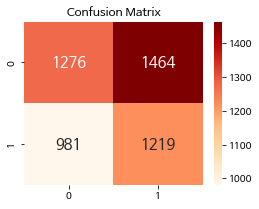

In [ ]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


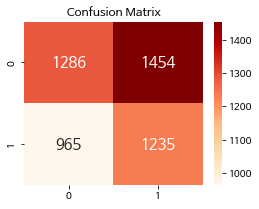

In [ ]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


- 기본적인 불용어사전에 임의로 여러 개의 단어를 넣고 조합을 돌려봤는데, 감성사전과 명사 중심의 헤드라인으로 추출되었다보니 불용어 처리에 미흡한 점이 보인다.
- 따라서, 주식시장과 관련한 불용어 사전을 만드는데, 명사 중 중립단어(앞 뒤 단어에 의해 맥락이 결정되는 단어)를 선정하여 앞 뒤 단어에 대한 조합도 고려해야 할 것으로 보인다.
  - ex) 반도체, 이재용, 오너 등의 단어는 뒷 단어로 호황(침체), 사면(재수감), 리스크(리더십)와 조합에 따라 큰 차이를 보이므로 중립단어로 판단할 수 있는데, 이와 관련한 중립단어에 대한 명확한 기준을 세워야한다.
  (중립단어가 포함된 헤드라인은 상승/하락 수와 거의 일치하는 수준으로 진행되기 때문)
